Dataset Link- https://statso.io/website-performance-case-study/

In [1]:
from google.colab import files
uploaded=files.upload()

Saving data-export.csv to data-export.csv


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:

df=pd.read_csv('data-export.csv')
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [4]:
#Grabbing the 1st row as header
new_header=df.iloc[0]
df=df[1:]
df.columns=new_header
df.reset_index(drop=True,inplace=True)

df.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Session primary channel group (Default channel group)  3182 non-null   object
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   object
 2   Users                                                  3182 non-null   object
 3   Sessions                                               3182 non-null   object
 4   Engaged sessions                                       3182 non-null   object
 5   Average engagement time per session                    3182 non-null   object
 6   Engaged sessions per user                              3182 non-null   object
 7   Events per session                                     3182 non-null   object
 8   Engagement rate                                        318

In [6]:
df.describe()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
count,3182,3182,3182,3182,3182,3182,3182,3182,3182,3182
unique,7,672,147,180,103,2823,808,2025,986,678
top,Direct,2024042417,1,1,0,0,0,1,0,1
freq,672,6,335,340,393,170,393,133,393,115


In [7]:
df['Date + hour (YYYYMMDDHH)']=pd.to_datetime(df['Date + hour (YYYYMMDDHH)'],format='%Y%m%d%H')
df['Users']=pd.to_numeric(df['Users'])
df['Sessions'] = pd.to_numeric(df['Sessions'])

#Grouping and then summing the data by same date and time to have a good total
grouped_data=df.groupby(df['Date + hour (YYYYMMDDHH)']).agg({'Users':'sum','Sessions':'sum'})

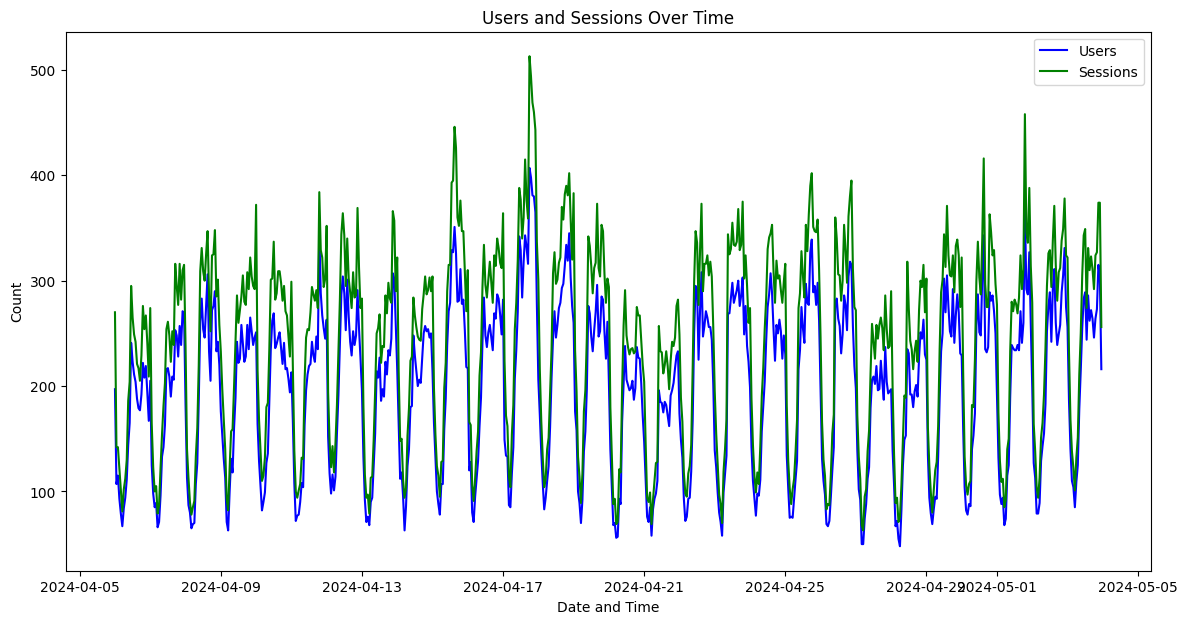

In [8]:
#Plotting aggregated users and sessions over time
plt.figure(figsize=(14,7))
plt.plot(grouped_data.index,grouped_data['Users'],label='Users',color='blue')
plt.plot(grouped_data.index,grouped_data['Sessions'],label='Sessions',color='green')
plt.title('Users and Sessions Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Count')
plt.legend()
plt.show()

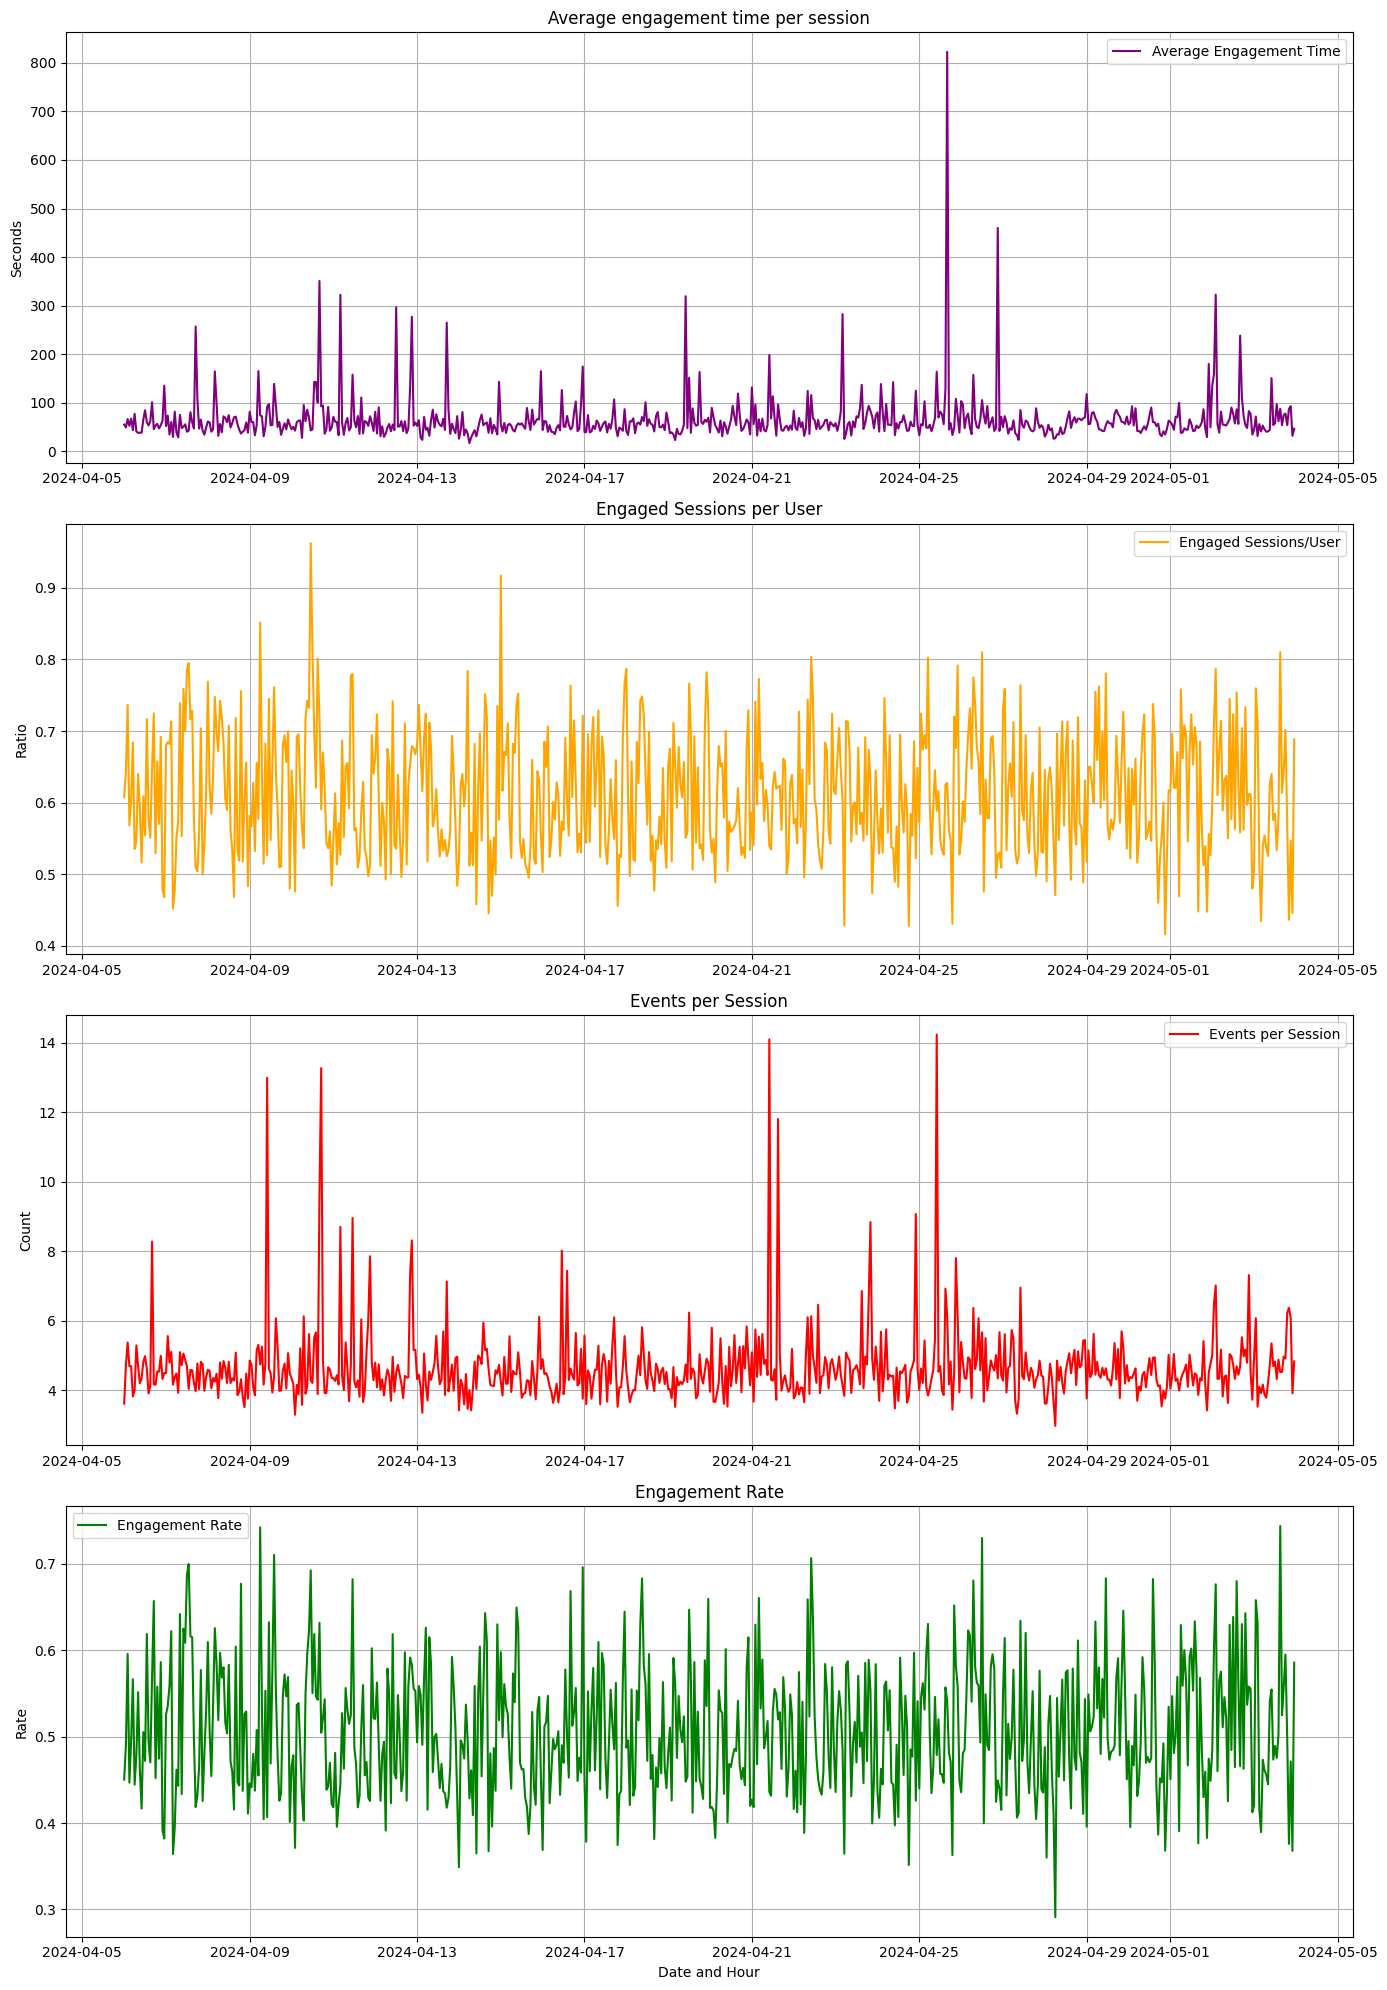

In [9]:
# convert relevant columns to numeric for engagement analysis
df['Engaged sessions'] = pd.to_numeric(df['Engaged sessions'])
df['Average engagement time per session'] = pd.to_numeric(df['Average engagement time per session'])
df['Engaged sessions per user'] = pd.to_numeric(df['Engaged sessions per user'])
df['Events per session'] = pd.to_numeric(df['Events per session'])
df['Engagement rate'] = pd.to_numeric(df['Engagement rate'])

#group data by date and calculate mean for engagement metrics
engagement_metrics=df.groupby(df['Date + hour (YYYYMMDDHH)']).agg({
        'Average engagement time per session': 'mean',
    'Engaged sessions per user': 'mean',
    'Events per session': 'mean',
    'Engagement rate': 'mean'
})

#plotting engagement metrics
fig,ax=plt.subplots(4,1,figsize=(14,20))

ax[0].plot(engagement_metrics.index,engagement_metrics['Average engagement time per session'],label='Average Engagement Time',color='purple')
ax[0].set_title('Average engagement time per session')
ax[0].set_ylabel('Seconds')

ax[1].plot(engagement_metrics.index, engagement_metrics['Engaged sessions per user'], label='Engaged Sessions/User', color='orange')
ax[1].set_title('Engaged Sessions per User')
ax[1].set_ylabel('Ratio')

ax[2].plot(engagement_metrics.index, engagement_metrics['Events per session'], label='Events per Session', color='red')
ax[2].set_title('Events per Session')
ax[2].set_ylabel('Count')

ax[3].plot(engagement_metrics.index, engagement_metrics['Engagement rate'], label='Engagement Rate', color='green')
ax[3].set_title('Engagement Rate')
ax[3].set_ylabel('Rate')
ax[3].set_xlabel('Date and Hour')

for a in ax:
  a.legend()
  a.grid(True)

plt.tight_layout()
plt.show()

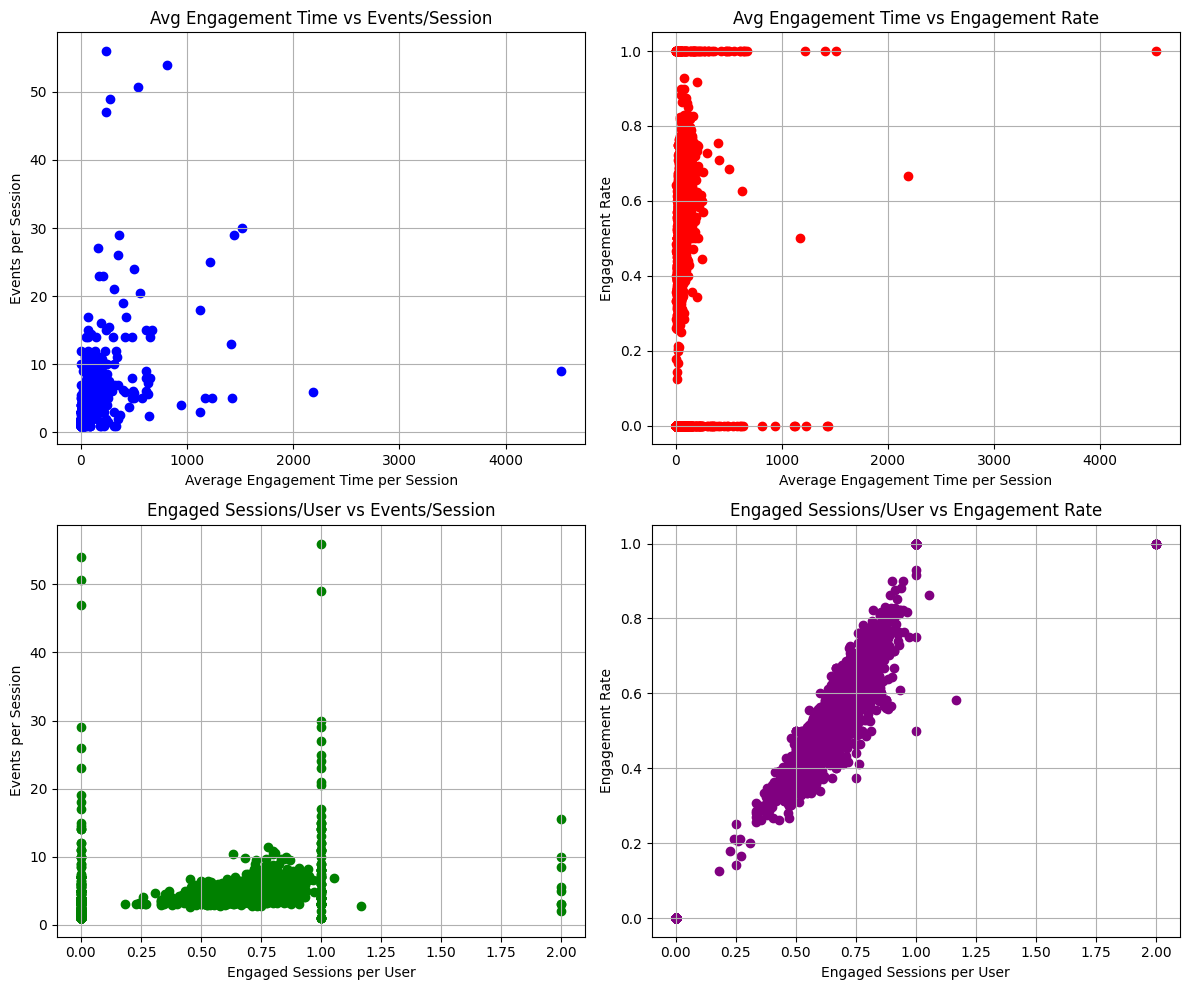

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# plot 1: average engagement time vs events per session
axes[0, 0].scatter(df['Average engagement time per session'], df['Events per session'], color='blue')
axes[0, 0].set_title('Avg Engagement Time vs Events/Session')
axes[0, 0].set_xlabel('Average Engagement Time per Session')
axes[0, 0].set_ylabel('Events per Session')
axes[0, 0].grid(True)  # enable grid

# plot 2: average engagement time vs engagement rate
axes[0, 1].scatter(df['Average engagement time per session'], df['Engagement rate'], color='red')
axes[0, 1].set_title('Avg Engagement Time vs Engagement Rate')
axes[0, 1].set_xlabel('Average Engagement Time per Session')
axes[0, 1].set_ylabel('Engagement Rate')
axes[0, 1].grid(True)

# plot 3: engaged sessions per user vs events per session
axes[1, 0].scatter(df['Engaged sessions per user'], df['Events per session'], color='green')
axes[1, 0].set_title('Engaged Sessions/User vs Events/Session')
axes[1, 0].set_xlabel('Engaged Sessions per User')
axes[1, 0].set_ylabel('Events per Session')
axes[1, 0].grid(True)

# plot 4: engaged sessions per user vs engagement rate
axes[1, 1].scatter(df['Engaged sessions per user'], df['Engagement rate'], color='purple')
axes[1, 1].set_title('Engaged Sessions/User vs Engagement Rate')
axes[1, 1].set_xlabel('Engaged Sessions per User')
axes[1, 1].set_ylabel('Engagement Rate')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

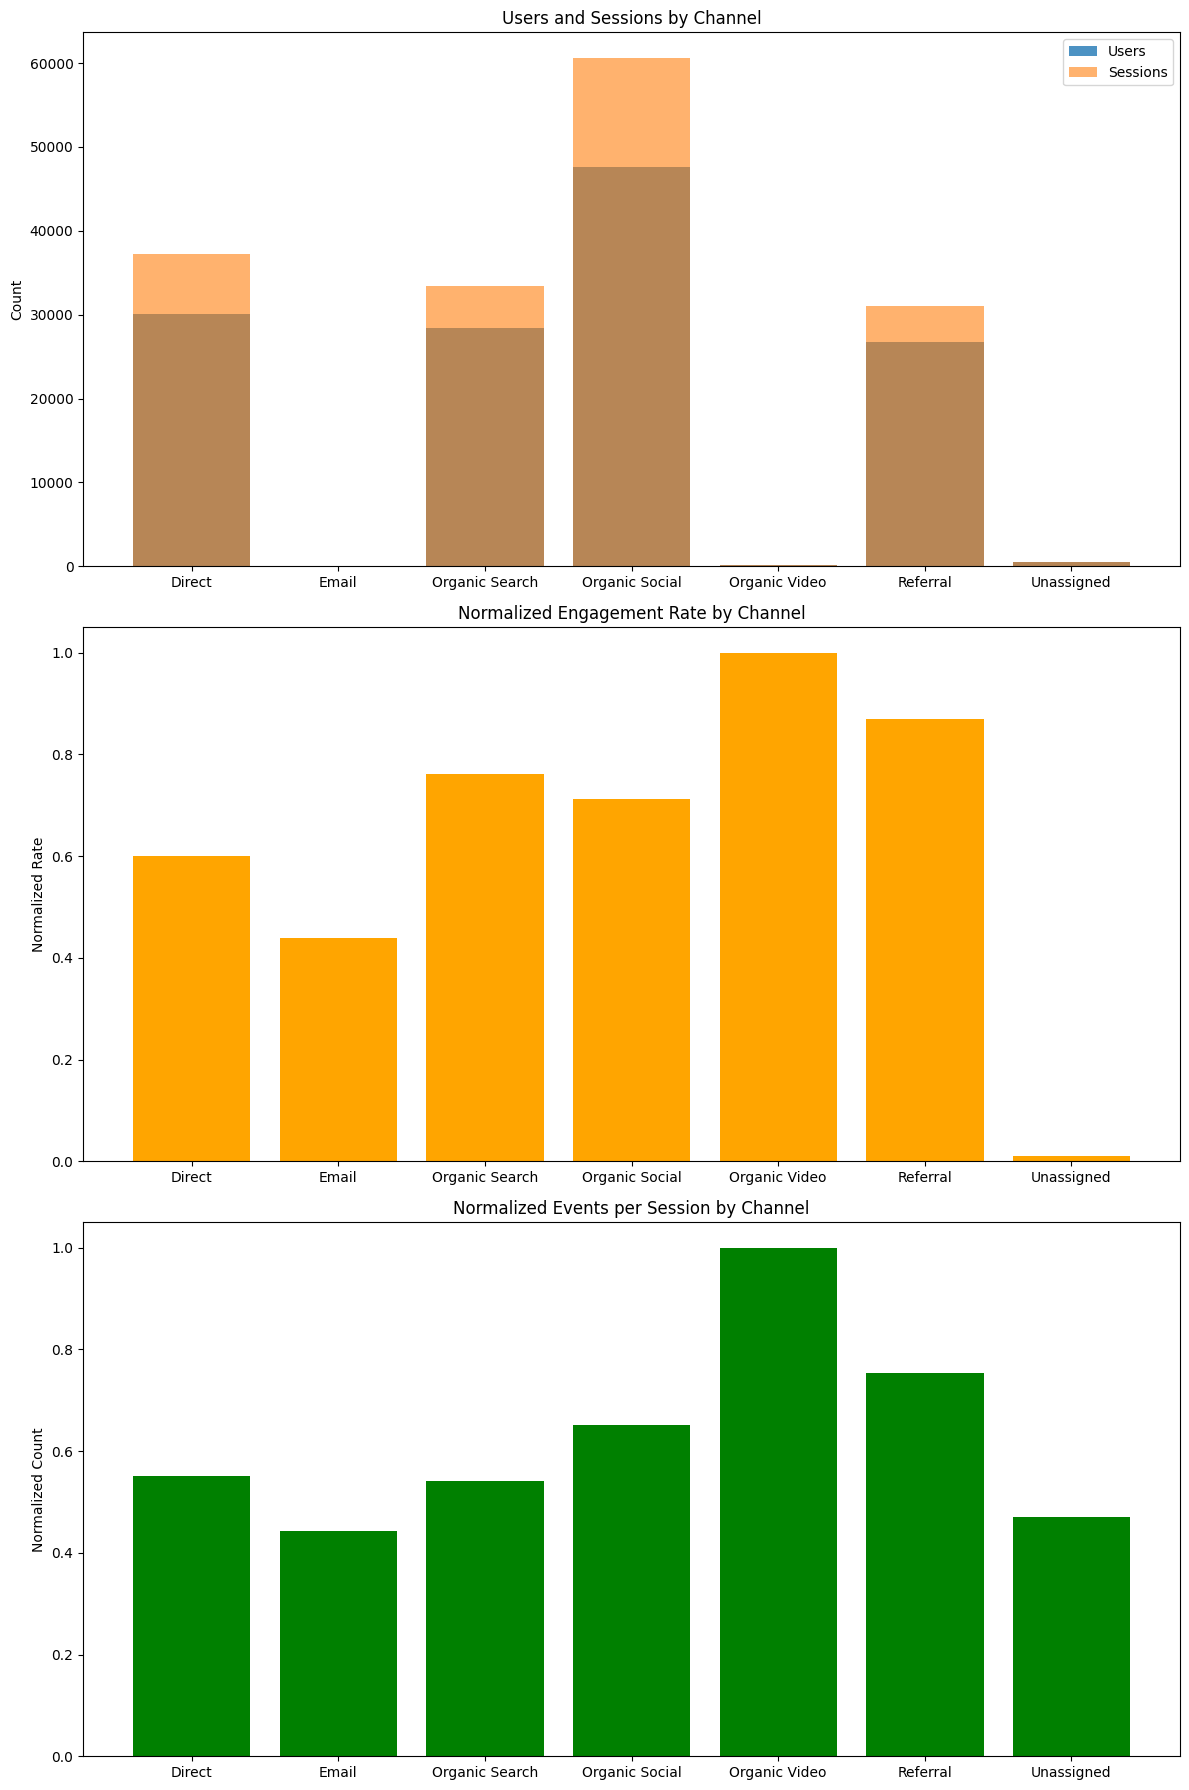

In [11]:
# group data by channel and aggregate necessary metrics
channel_performance = df.groupby('Session primary channel group (Default channel group)').agg({
    'Users': 'sum',
    'Sessions': 'sum',
    'Engaged sessions': 'sum',
    'Engagement rate': 'mean',
    'Events per session': 'mean'
})

# normalize engagement rate and events per session for comparison
channel_performance['Normalized Engagement Rate'] = channel_performance['Engagement rate'] / channel_performance['Engagement rate'].max()
channel_performance['Normalized Events per Session'] = channel_performance['Events per session'] / channel_performance['Events per session'].max()

# plotting channel performance metrics
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# users and sessions by channel
ax[0].bar(channel_performance.index, channel_performance['Users'], label='Users', alpha=0.8)
ax[0].bar(channel_performance.index, channel_performance['Sessions'], label='Sessions', alpha=0.6)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()

# normalized engagement rate by channel
ax[1].bar(channel_performance.index, channel_performance['Normalized Engagement Rate'], color='orange')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')

# normalized events per session by channel
ax[2].bar(channel_performance.index, channel_performance['Normalized Events per Session'], color='green')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')

plt.tight_layout()
plt.show()

Forcasting Website Traffic

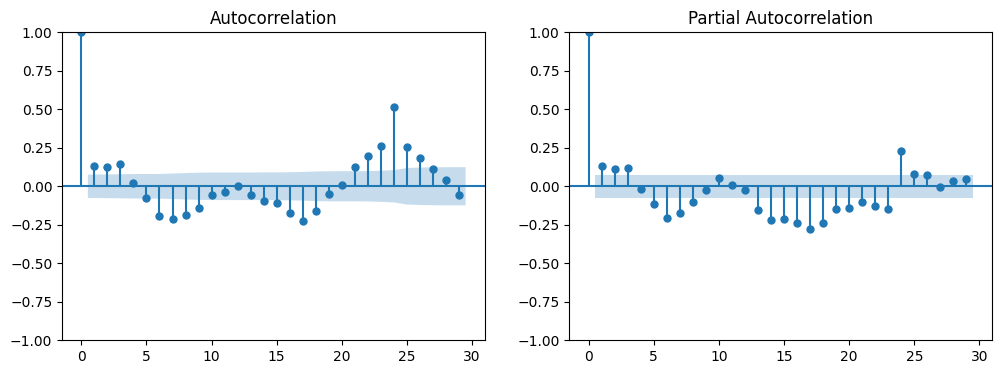

In [15]:
time_series_data=grouped_data['Sessions'].asfreq('h').ffill()
seasonal_period=24

differenced_series=time_series_data.diff().dropna()

# plot ACF and PACF of time series
fig,axes=plt.subplots(1,2,figsize=(12,4))
plot_acf(differenced_series,ax=axes[0])
plot_pacf(differenced_series,ax=axes[1])
plt.show()

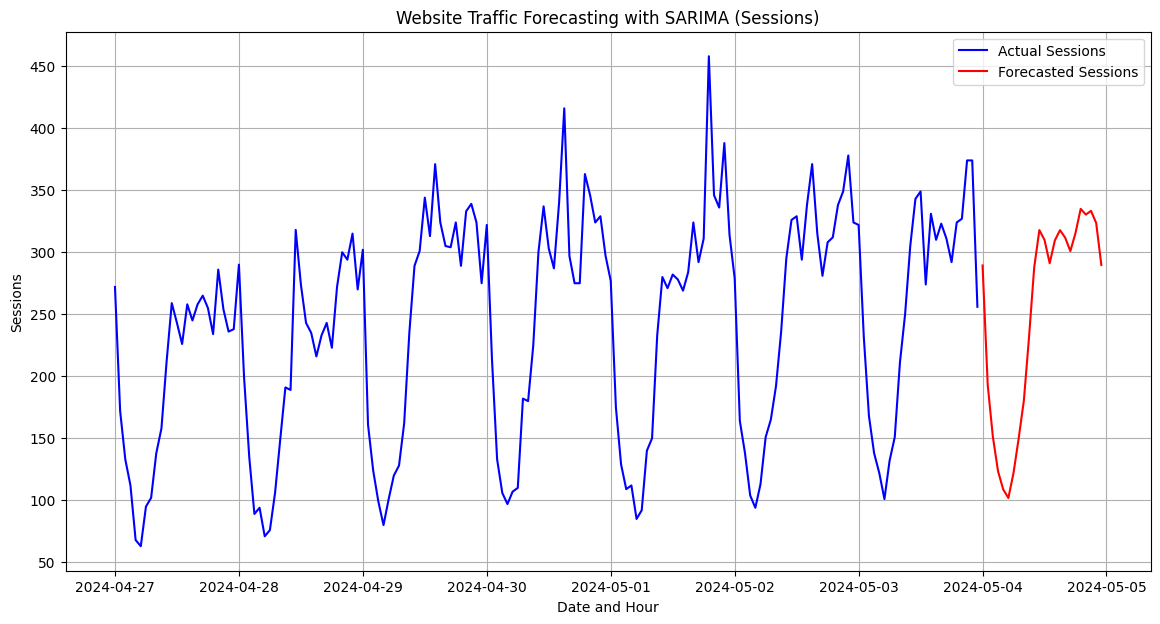

In [17]:
#Training the SARIMA model
sarima_model=SARIMAX(time_series_data,order=(1,1,1),seasonal_order=(1,1,1,seasonal_period))
sarima_model_fit=sarima_model.fit()

#Forecasting next 24hours using SARIMA model
sarima_forecast=sarima_model_fit.forecast(steps=24)

#Plotting the actual data and the SARIMA forecast
plt.figure(figsize=(14,7))
plt.plot(time_series_data.index[-168:],time_series_data[-168:],label='Actual Sessions',color='blue')
plt.plot(pd.date_range(time_series_data.index[-1],periods=25,freq='h')[1:],sarima_forecast,label='Forecasted Sessions',color='red')
plt.title('Website Traffic Forecasting with SARIMA (Sessions)')
plt.xlabel('Date and Hour')
plt.ylabel('Sessions')
plt.legend()
plt.grid(True)
plt.show()